# Homework1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
data=pd.read_csv(r"C:\Users\ritvikpalvankar7\Downloads\hour.csv")
data1=data.drop(['instant','casual','mnth','dteday'],axis=1)
data_new=data.drop(['dteday'],axis=1)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [3]:
S=StandardScaler()

In [4]:
data2=S.fit(data_new)
data2=S.transform(data_new)
data3=S.fit(data1)
data3=S.transform(data1)

In [5]:
data_t=np.transpose(data2)
D3=np.transpose(data3)

In [6]:
a= (data2-data2.min())/(data2.max()-data2.min())
b= (data3-data3.min())/(data3.max()-data3.min())

In [7]:
a1 =(data_t-data_t.min())/(data_t.max()-data_t.min())
b1=(D3-D3.min())/(D3.max()-D3.min())

In [8]:
A1=(a1@a)
A2=(b1@b)

# As seen in the heatmap, the elements(data) which were highly correlated were dropped. 'instant','casual', 'mnth' and 'dtdelay' were hence dropped from the dataset.

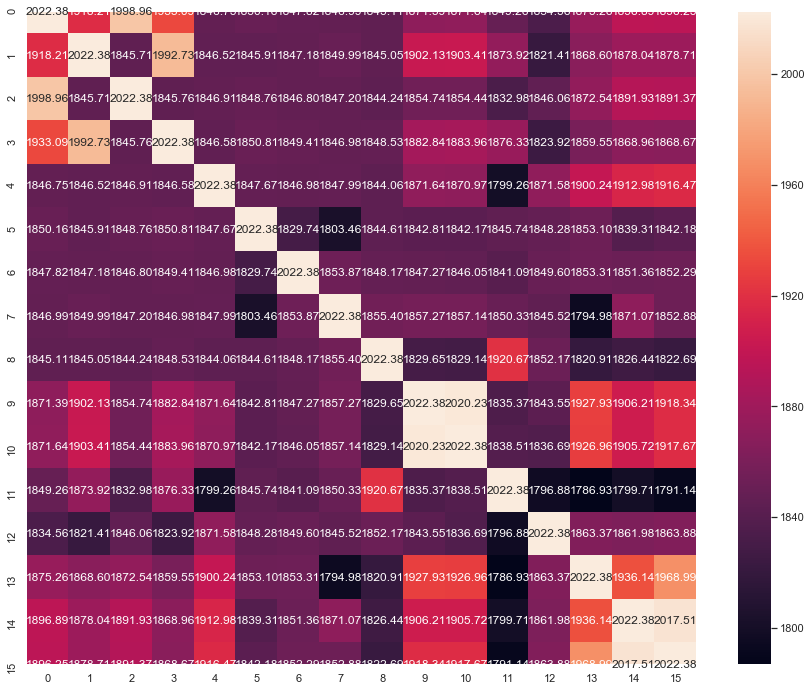

In [9]:
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(A1,annot=True,fmt='0.2f',ax=ax)


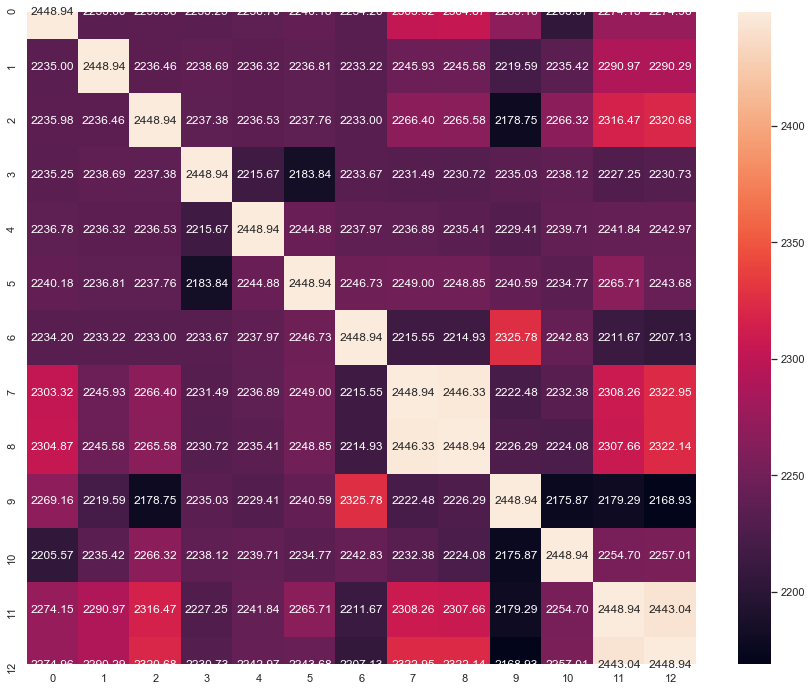

In [10]:
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(A2,annot=True,fmt='0.2f',ax=ax)

# dteday can be transformed into week number

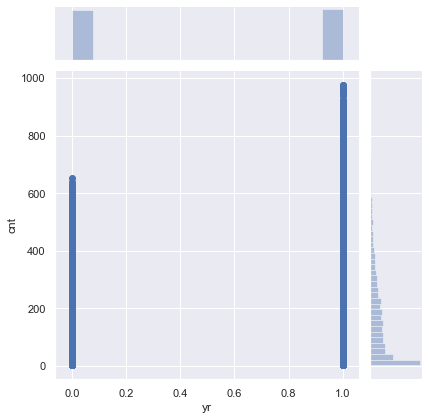

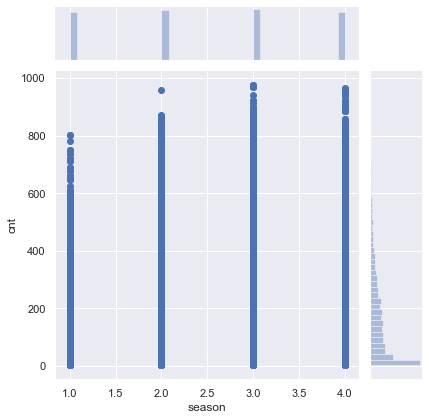

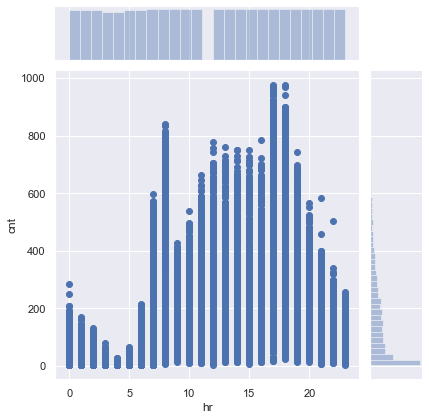

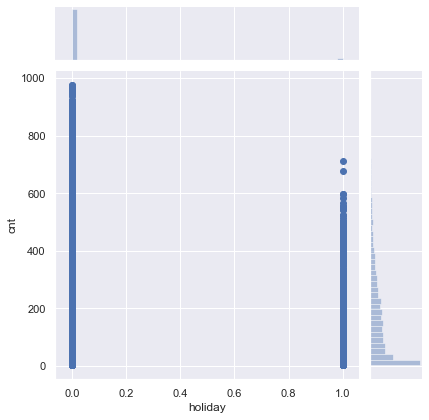

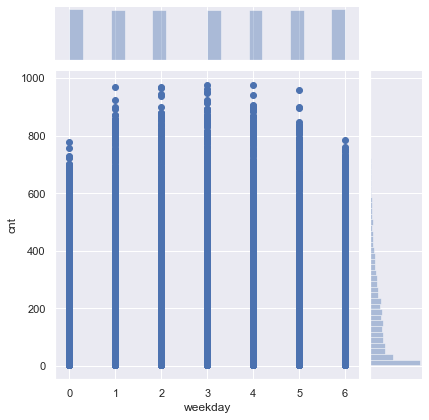

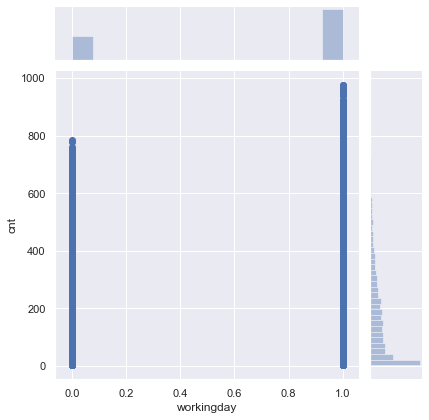

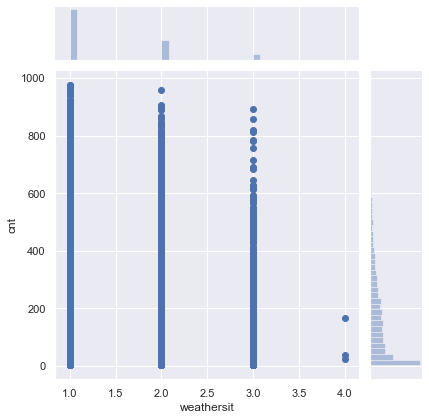

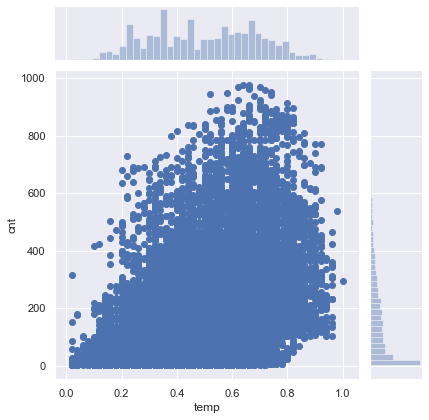

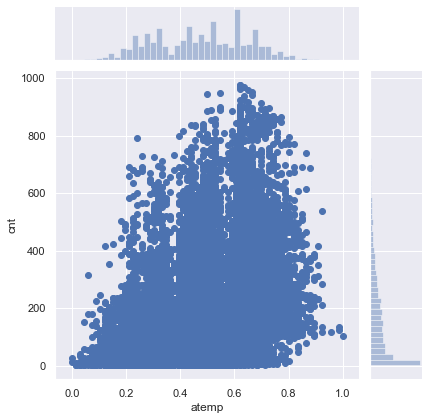

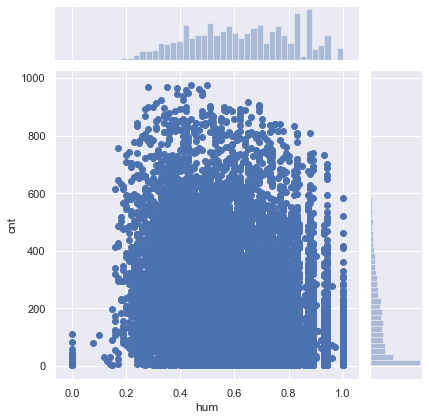

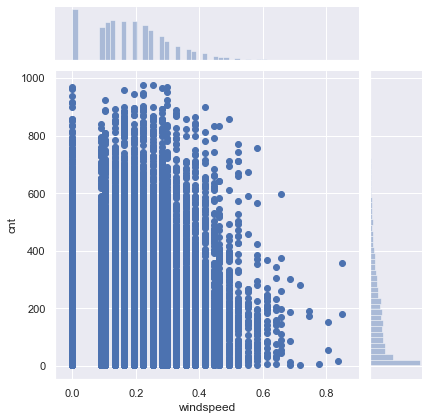

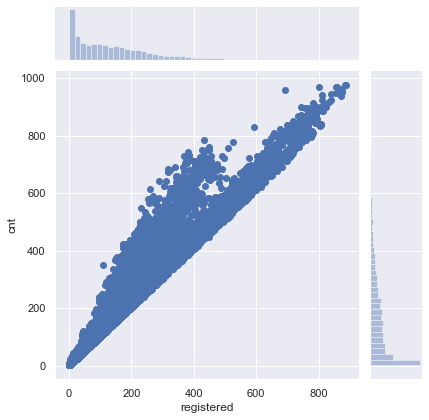

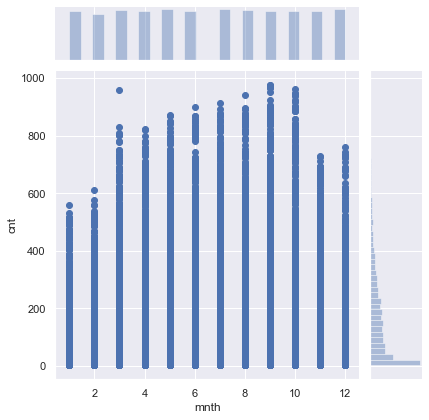

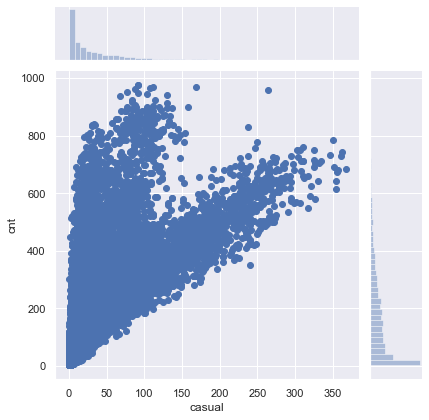

In [11]:
sns.jointplot("yr",'cnt',data)

sns.jointplot("season",'cnt',data)

sns.jointplot("hr",'cnt',data)

sns.jointplot("holiday",'cnt',data)

sns.jointplot("weekday",'cnt',data)

sns.jointplot("workingday",'cnt',data)

sns.jointplot("weathersit",'cnt',data)

sns.jointplot("temp",'cnt',data)

sns.jointplot("atemp",'cnt',data)

sns.jointplot("hum",'cnt',data)

sns.jointplot("windspeed",'cnt',data)

sns.jointplot("registered",'cnt',data)

sns.jointplot("mnth",'cnt',data)

sns.jointplot("casual",'cnt',data)

# Calculating MAP and MLE

# First, I separated the data into 70 and 30%. 70 for training set and the rest for testing set. Then, calculated w using the given formula, tested it against y and then plotted y against testing data

In [12]:
np.random.seed(2)
ran=np.random.rand(len(data1)) < 0.7
tr=data1[ran]
tst=data1[~ran]

In [13]:
Ttrain=tr['cnt']
Ttest=tst['cnt']
tr=tr.drop(['cnt'],axis=1)
tst=tst.drop(['cnt'],axis=1)

In [14]:
WMLE = np.linalg.inv(tr.T@tr)@tr.T@Ttrain
W1_MLE=np.array(WMLE)
YMLE=tst@W1_MLE
E1=YMLE-Ttest

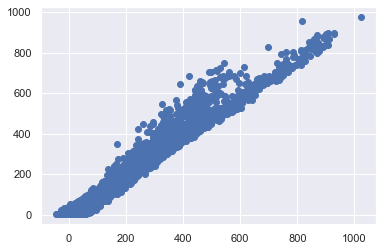

In [15]:
plt.scatter(YMLE,Ttest)

# MAP

# For MAP, I took the values of lambda and iterated it to calculate wmap. Then, I calculated the error and then chose the best values and then plotted it

# We get the best plot for lambda=300 by looking at the model below(which has the least error) 

In [16]:

lambdas=np.linspace(300,20000000,10)

The mean prediction error = -0.4419605609586255
The mean prediction error = -3.8227587604864004
The mean prediction error = -5.159090449300327
The mean prediction error = -6.133794902904677
The mean prediction error = -6.986406917440215
The mean prediction error = -7.78103401394101
The mean prediction error = -8.542132545016473
The mean prediction error = -9.28108010592006
The mean prediction error = -10.003903790879875
The mean prediction error = -10.714107318864219


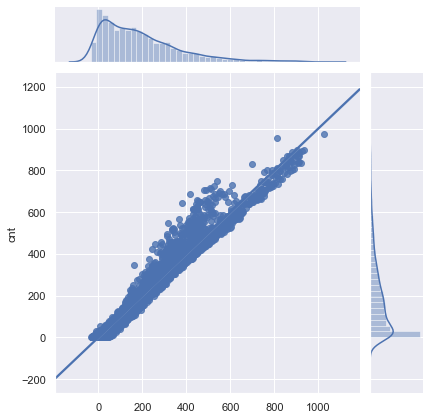

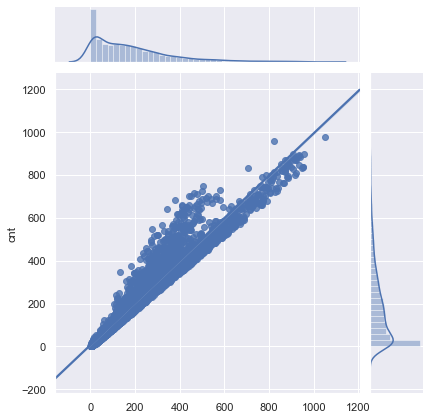

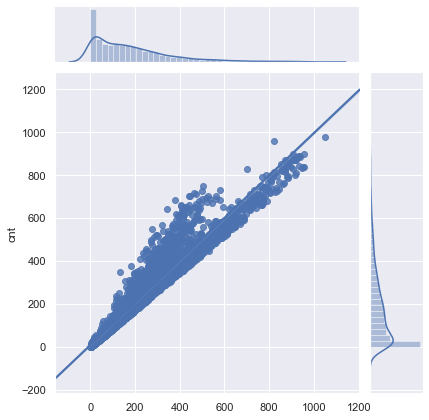

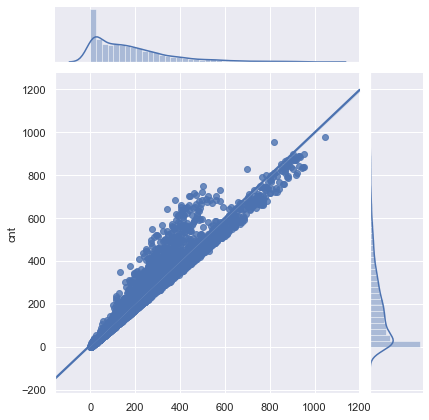

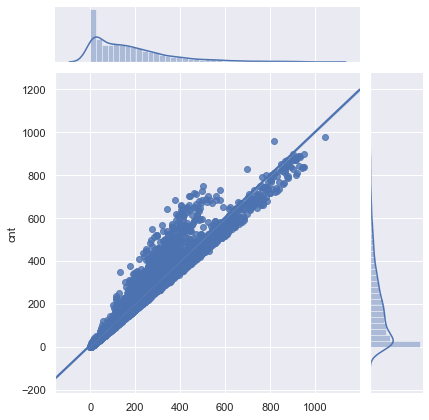

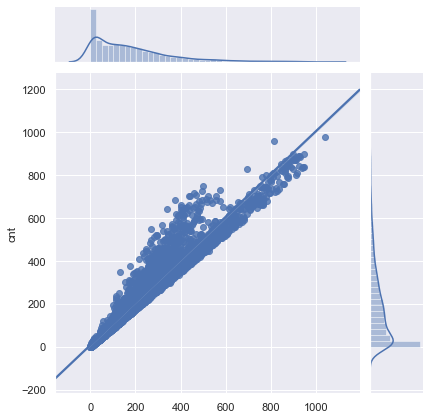

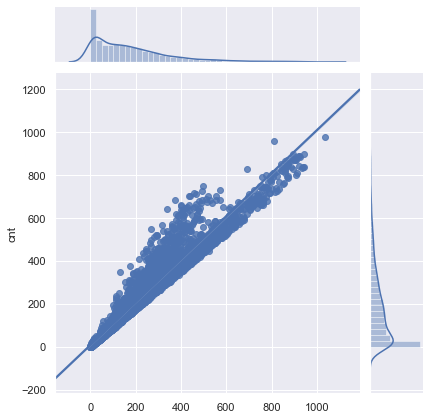

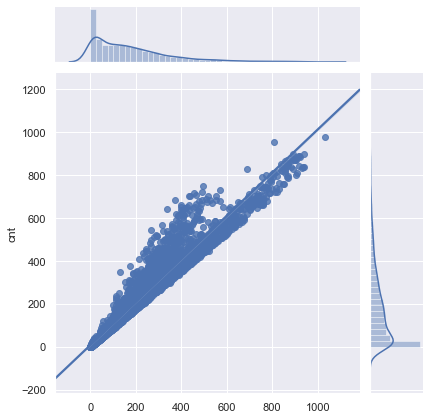

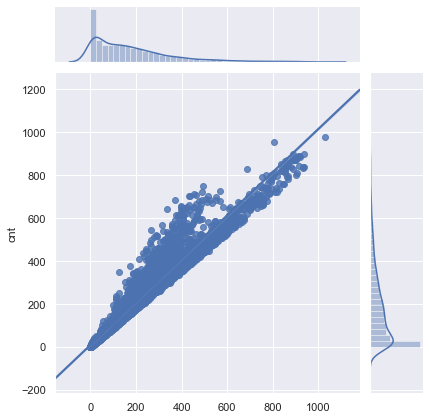

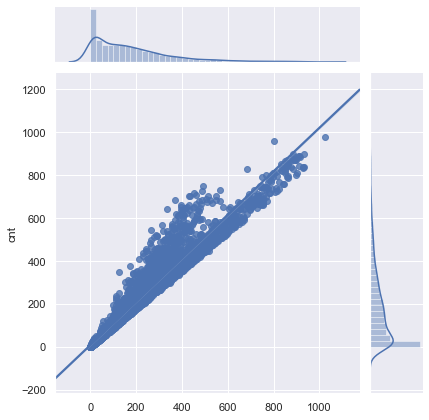

In [17]:
for i in lambdas:

    I=i*np.identity(12)
    WMAP = np.linalg.inv((tr.T@tr)+I)@tr.T@Ttrain
    W1_MAP=np.array(WMAP)
    Yt1=tst@W1_MAP
    E2=Yt1-Ttest
    c=E2.mean()
    print("The mean prediction error = {}".format(c))
    sns.jointplot(Yt1,Ttest,kind='reg')

# Mean prediction for mle

In [18]:
E1.mean()

-0.4952045974788414

# Mean prediction for map

In [19]:
E2.mean() 

-10.714107318864219

# Median prediction error

In [20]:
E1.median()

3.277161026190072

# Median prediction error

In [21]:
E2.median()

0.07560912333777559

# Q-Q Plot for MLE

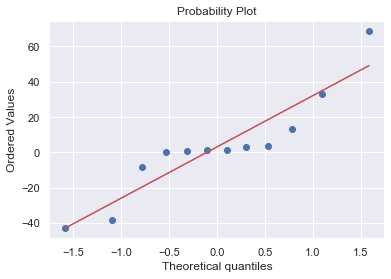

In [22]:
import pylab
import scipy.stats as stats
stats.probplot(W1_MLE,dist="norm",plot=pylab)
pylab.show()

# Q-Q Plot for MAP

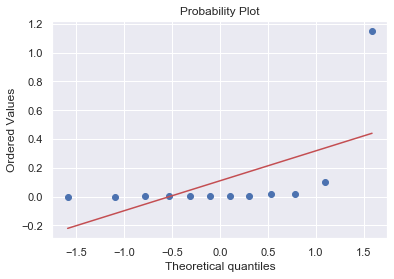

In [23]:
import pylab
import scipy.stats as stats
stats.probplot(W1_MAP,dist="norm",plot=pylab)
pylab.show()

# R-square 

# The R square value we get is 0.9666. This model would be the best as R(mle) square lies between 0 and 100%

In [24]:
from sklearn.metrics import r2_score
r2_score(Ttest,YMLE)

0.9656595282798919

# R square for MAP

In [25]:
import numpy
def polyfit(x, y, degree):
    results = {}

    coeffs = numpy.polyfit(x, y, degree)

     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    # r-squared
    p = numpy.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                 
    ym = numpy.sum(y)/len(y)          
    sreg = numpy.sum((yhat-ym)**2)   
    stotal = numpy.sum((y - ym)**2)    
    results['determination'] = sreg / stotal

    return results

# For MLE

In [26]:

polyfit(Ttest,YMLE,2)['determination']

0.9656786845648297

# For MAP

In [27]:

polyfit(Ttest,Yt1,2)['determination']

0.9457292627993044